In [1]:
from keras.applications.vgg16 import VGG16
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))
vgg.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
from keras.datasets.cifar10 import load_data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# ((x_train, y_train), (x_test, y_test))
((x_train, y_train), (x_test, y_test)) = load_data()

In [3]:
print("訓練資料維度:", x_train.shape)
print("測試資料維度:", x_test.shape)

訓練資料維度: (50000, 32, 32, 3)
測試資料維度: (10000, 32, 32, 3)


In [0]:
trans = {0:"飛機", 1:"車", 2:"鳥", 3:"貓", 4:"鹿",
         5:"狗", 6:"青蛙", 7:"馬", 8:"船", 9:"卡車"}

什麼分類: 鹿


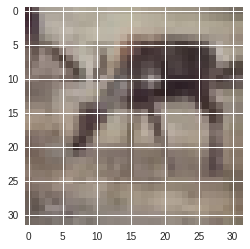

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("什麼分類:", trans[y_train[c][0]])
plt.imshow(x_train[c])

In [6]:
# 資料預處理
# 1. 圖片 = 0~1
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# 2. 目標: One-hot
from keras.utils import np_utils
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
# see see
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
cnn = Sequential()
# 一個過濾器(3 * 3 * 3) * (n個過濾器)32 + (bias)32
cnn.add(Conv2D(input_shape=(32, 32, 3), 
               activation="relu",
               filters=32,
               kernel_size=(3, 3),
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (3 * 3 * 32) * 64 + 64
cnn.add(Conv2D(activation="relu",
               filters=64,
               kernel_size=(3, 3),
               padding="same"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (3 * 3 * 32) * 64 + 64
cnn.add(Conv2D(activation="relu",
               filters=128,
               kernel_size=(3, 3),
               padding="same"))
cnn.add(Flatten())
cnn.add(Dense(units=1024, activation="relu"))
cnn.add(Dense(units=128, activation="relu"))
cnn.add(Dense(units=10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              8389632   
__________

In [0]:
# 二元: binary_crossentropy
# 多元: categorical_crossentropy
cnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [9]:
# batch: 看幾筆作一次梯度下降(100 - 200)
# epoch: 課文要抄幾遍
# ?次更新: 60000 * 10 / 200
train_history = cnn.fit(x_train_shape, y_train_cat,
                         validation_split=0.1,
                         batch_size=200, 
                         epochs=10,
                         verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
 - 11s - loss: 1.5469 - acc: 0.4409 - val_loss: 1.1893 - val_acc: 0.5740
Epoch 2/5
 - 9s - loss: 1.0770 - acc: 0.6166 - val_loss: 0.9594 - val_acc: 0.6660
Epoch 3/5
 - 9s - loss: 0.8837 - acc: 0.6926 - val_loss: 0.8555 - val_acc: 0.7036
Epoch 4/5
 - 9s - loss: 0.7191 - acc: 0.7466 - val_loss: 0.8153 - val_acc: 0.7240
Epoch 5/5
 - 9s - loss: 0.5957 - acc: 0.7935 - val_loss: 0.7680 - val_acc: 0.7436


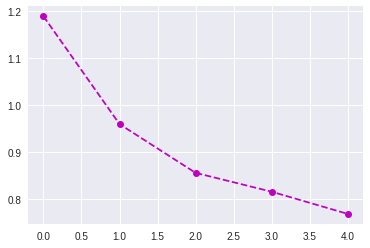

In [10]:
ys = train_history.history["val_loss"]
plt.plot(ys, "mo--")

In [11]:
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 1s 148us/step


[0.8091890993118286, 0.7261]

In [14]:
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = cnn.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,787,15,66,21,18,8,8,12,51,14
1,20,862,14,11,4,4,8,3,22,52
2,57,3,640,60,80,68,39,45,6,2
3,19,3,92,541,58,189,38,41,10,9
4,10,3,69,74,659,33,48,92,11,1
5,9,4,46,164,34,659,13,68,3,0
6,4,1,58,87,26,43,763,8,6,4
7,14,2,39,35,32,55,2,816,2,3
8,68,31,35,15,7,9,6,4,810,15
9,52,91,25,19,4,19,6,23,37,724


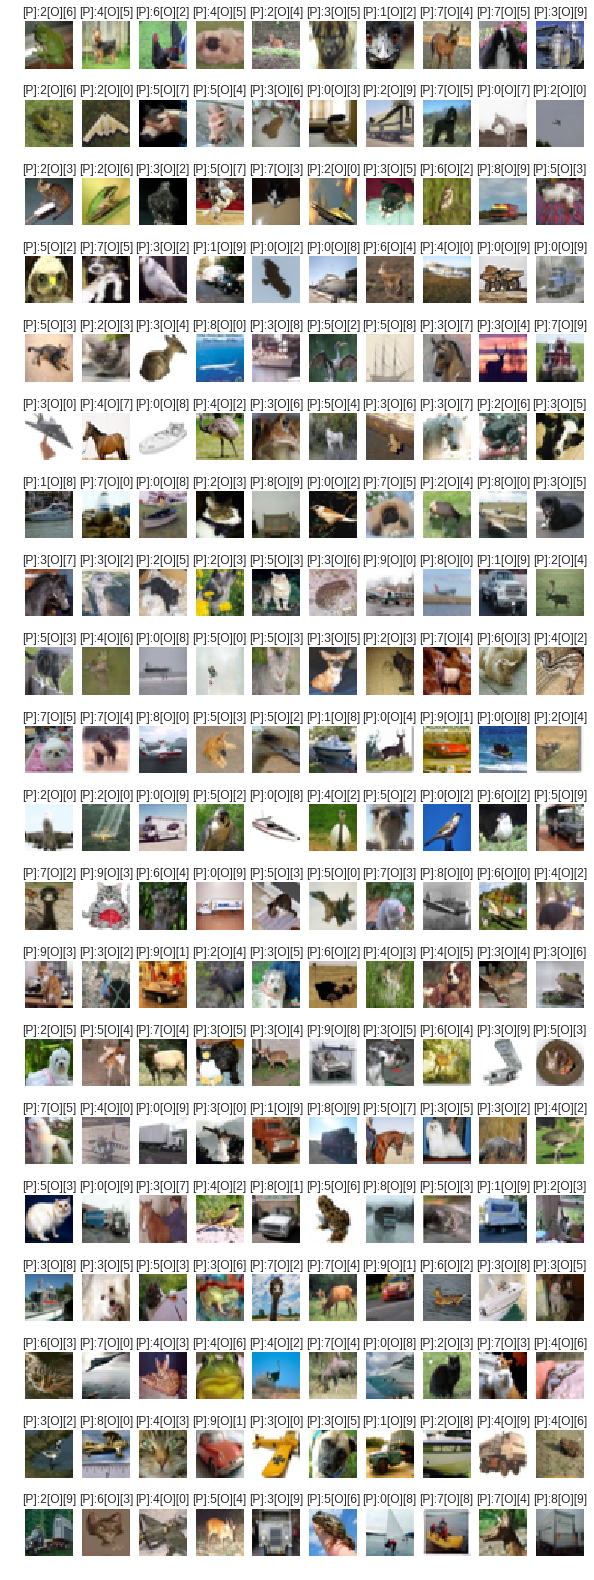

In [16]:
# enumerate -> (index, data) 
# 預測錯誤的image
diff_img = []
# 預測錯誤的正確標籤
diff_label_right = []
# 預測錯誤的預測標籤
diff_label_pre = []
times = 0
for (index, data) in enumerate(y_test):
    # 預測和正確不一樣
    if not data == pre[index]:
        diff_img.append(x_test[index])
        diff_label_right.append(data)
        diff_label_pre.append(pre[index])
        times = times + 1
        if times == 200:
          break
  
width = 10
height = int(len(diff_img) / 10) + 1
plt.figure(figsize=(10, 30))
for (index, img) in enumerate(diff_img):
    plt.subplot(height, width, index + 1)
    plt.axis("off")
    t = "[P]:" + str(diff_label_pre[index]) + "[O]" + str(diff_label_right[index])
    plt.title(t)
    plt.imshow(img)